In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf, matplotlib.pyplot as plt, numpy as np, cv2

import warnings
warnings.filterwarnings('ignore')

In [2]:
x_numpy = np.load("x_data_random_y.npz")['arr_0']
y_label = np.load("y_data_random_y.npz")['arr_0']
y = (y_label==True).astype(int)
x_train, x_test, y_train, y_test = train_test_split(x_numpy,y,random_state=True,train_size=0.8,stratify=y)
x_numpy = None
y_label = None

In [3]:
## optimizer
rms='rmsprop'
adam='adam'

## loss
SPC = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
CC = tf.keras.losses.CategoricalCrossentropy()
BC = 'binary_crossentropy'
MSE = 'mse'

## last layer
softmax = 'softmax'
sigmoid = 'sigmoid'

In [4]:
input_shape=(360, 360, 1)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Rescaling(1./255, input_shape=input_shape))
model.add(tf.keras.layers.AveragePooling2D())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(16, (2,2), activation='relu'))
model.add(tf.keras.layers.AveragePooling2D())
#model.add(tf.keras.layers.AveragePooling2D())
#####
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#model.compile(loss=MSE, optimizer=rms, metrics=['accuracy'])

model.compile(loss=BC, optimizer=adam, metrics=['accuracy'])

In [5]:
model.count_params()
#model.summary()

57665

---

In [23]:
model.fit(x_train,y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
188/188 [==============================] - 1s 5ms/step - loss: 0.1116 - accuracy: 0.9497
Epoch 2/10
188/188 [==============================] - 1s 5ms/step - loss: 0.1195 - accuracy: 0.9450
Epoch 3/10
188/188 [==============================] - 1s 5ms/step - loss: 0.1058 - accuracy: 0.9545
Epoch 4/10
188/188 [==============================] - 1s 5ms/step - loss: 0.1058 - accuracy: 0.9530
Epoch 5/10
188/188 [==============================] - 1s 5ms/step - loss: 0.0997 - accuracy: 0.9552
Epoch 6/10
188/188 [==============================] - 1s 5ms/step - loss: 0.1020 - accuracy: 0.9543
Epoch 7/10
188/188 [==============================] - 1s 5ms/step - loss: 0.0929 - accuracy: 0.9605
Epoch 8/10
188/188 [==============================] - 1s 5ms/step - loss: 0.0900 - accuracy: 0.9620
Epoch 9/10
188/188 [==============================] - 1s 5ms/step - loss: 0.0855 - accuracy: 0.9637
Epoch 10/10
188/188 [==============================] - 1s 5ms/step - loss: 0.0877 - accuracy: 0.9620

In [24]:
y_prob = model.predict(x_test)
print(y_prob.max())

47/47 [==============================] - 0s 3ms/step
0.9999224


In [25]:
y_pred = list(map(lambda x: x>0.5,y_prob))

import pandas as pd
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1200
           1       0.75      0.86      0.80       300

    accuracy                           0.91      1500
   macro avg       0.86      0.89      0.87      1500
weighted avg       0.92      0.91      0.92      1500

[[1113   87]
 [  42  258]]


In [26]:
#x_train, y_train = None,None

---

In [27]:
x_valid = np.load("x_test_data_random_y.npz")['arr_0']
y_valid = np.load("y_test_data_random_y.npz")['arr_0']
y = (y_valid==True).astype(int)

In [28]:
y_prob = model.predict(x_valid)
print(y_prob.max())
y_pred = list(map(lambda x: x>0.5,y_prob))

79/79 [==============================] - 0s 3ms/step
0.99996614


In [29]:
print(classification_report(y_valid,y_pred))
cm = confusion_matrix(y_valid,y_pred)
print(cm)
x_valid,y_valid = None,None

              precision    recall  f1-score   support

       False       0.96      0.94      0.95      2000
        True       0.78      0.83      0.80       500

    accuracy                           0.92      2500
   macro avg       0.87      0.88      0.87      2500
weighted avg       0.92      0.92      0.92      2500

[[1881  119]
 [  87  413]]


In [ ]:
y_pred = list(map(lambda x: x>0.5,y_prob))

import pandas as pd
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
col = ['N','Y']
print(pd.DataFrame(cm,index=col,columns = col))

In [30]:
y_test[0:5]

array([1, 0, 0, 0, 0])

In [31]:
y_pred[:5]

[array([ True]),
 array([False]),
 array([False]),
 array([False]),
 array([False])]

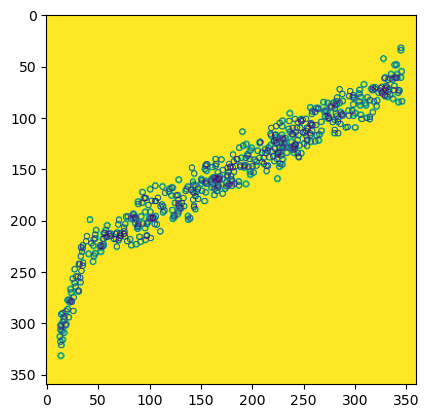

In [32]:
plt.imshow(x_test[0])

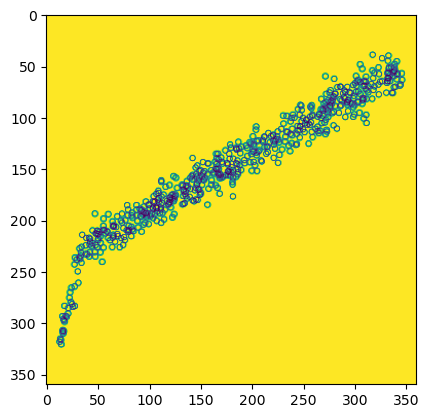

In [33]:
plt.imshow(x_test[1])

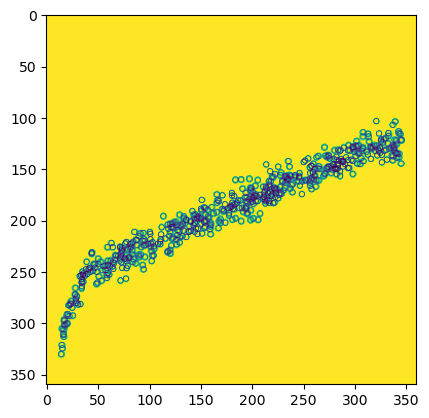

In [34]:
plt.imshow(x_test[2])

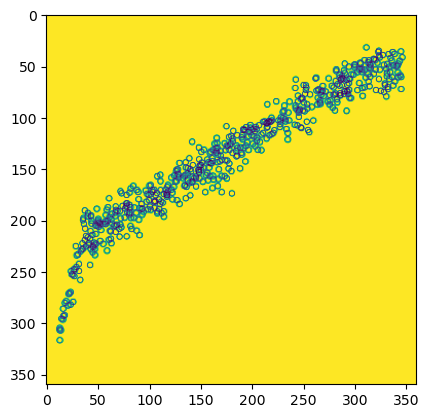

In [35]:
plt.imshow(x_test[3])

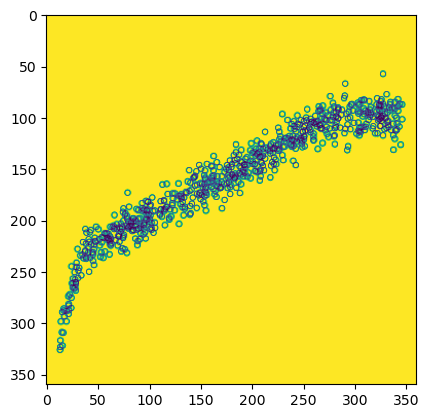

In [36]:
plt.imshow(x_test[4])